In [1]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt # use matplotlib for plotting with inline plot
%matplotlib inline

In [4]:
X = np.genfromtxt("C:\\Users\\regin\\Desktop\\CS 178\\Project\\X_train.txt", delimiter = None)
Y = np.genfromtxt("C:\\Users\\regin\\Desktop\\CS 178\\Project\\Y_train.txt", delimiter = None)
X, Y = ml.shuffleData(X, Y)

Xte = np.genfromtxt("C:\\Users\\regin\\Desktop\\CS 178\\Project\\X_test.txt", delimiter = None)

In [5]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y) # Default is 80% train & 20% val
Xtr, Ytr = ml.shuffleData(Xtr, Ytr)

In [34]:
np.random.seed(0)
n_bags = 10
bags = [] #self.learners

for l in range(n_bags):
    Xi, Yi = ml.bootstrapData(Xtr, Ytr, Xtr.shape[0])
    
    tree = ml.dtree.treeClassify(Xi, Yi, minParent = 2**6, maxDepth = 11, nFeatures = 6)
    bags.append(tree)
    
#     print("Decision Tree: {0}".format(l))
#     print("{0:>15}: {1:.4f}".format('Train AUC', bags[l].auc(Xtr, Ytr)))
#     print("{0:>15}: {1:.4f}".format('Validation AUC', bags[l].auc(Xva, Yva)))
    

In [35]:
for l in range(n_bags):
    print("Decision Tree: {0}".format(l))
    print("{0:>15}: {1:.4f}".format('Train AUC', bags[l].auc(Xtr, Ytr)))
    print("{0:>15}: {1:.4f}".format('Validation AUC', bags[l].auc(Xva, Yva)))

Decision Tree: 0
      Train AUC: 0.7122
 Validation AUC: 0.6858
Decision Tree: 1
      Train AUC: 0.7034
 Validation AUC: 0.6803
Decision Tree: 2
      Train AUC: 0.7123
 Validation AUC: 0.6889
Decision Tree: 3
      Train AUC: 0.7068
 Validation AUC: 0.6810
Decision Tree: 4
      Train AUC: 0.7108
 Validation AUC: 0.6844
Decision Tree: 5
      Train AUC: 0.7047
 Validation AUC: 0.6798
Decision Tree: 6
      Train AUC: 0.7099
 Validation AUC: 0.6845
Decision Tree: 7
      Train AUC: 0.7062
 Validation AUC: 0.6809
Decision Tree: 8
      Train AUC: 0.7028
 Validation AUC: 0.6806
Decision Tree: 9
      Train AUC: 0.7023
 Validation AUC: 0.6782


In [36]:
class BaggedTree(ml.base.classifier):
    def __init__(self, learners):
        self.learners = learners
        
    def predictSoft(self,X):
        n_bags = len(self.learners)
        preds = [self.learners[l].predictSoft(X) for l in range(n_bags)]
        return np.mean(preds, axis = 0)

In [37]:
bt = BaggedTree(bags)
bt.classes = np.unique(Y)

print("{0:>15}: {1:.4f}".format('Train AUC', bt.auc(Xtr, Ytr)))
print("{0:>15}: {1:.4f}".format('Validation AUC', bt.auc(Xva, Yva)))

      Train AUC: 0.7547
 Validation AUC: 0.7234


MaxDepth = 10

2**4 -> 0.7128

2**5 -> 0.7151

2**6 -> 0.7174

2**7 -> 0.7134 

2**8 -> 0.7110

MaxDepth = 11

2**6 ->

In [40]:
parent = [0,1,2,3,4,5,6,7,8,9,10, 11, 12, 13]
parent = [2**i for i in parent]


aucTrain = np.zeros(len(parent))
aucVal = np.zeros(len(parent))

for i in range(len(parent)):
    np.random.seed(0)
    n_bags = 10
    bags = [] #self.learners

    for l in range(n_bags):
        Xi, Yi = ml.bootstrapData(Xtr, Ytr, Xtr.shape[0])

        tree = ml.dtree.treeClassify(Xi, Yi, minParent = 2**6, maxDepth = 10, nFeatures = 6)
        bags.append(tree)

    bt = BaggedTree(bags)
    bt.classes = np.unique(Y)
    
    aucTrain[i] = bt.auc(Xtr, Ytr)
    aucVal[i] = bt.auc(Xva, Yva)

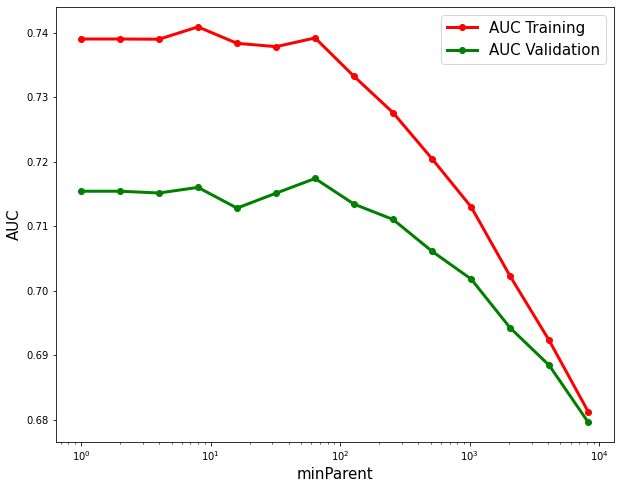

In [41]:
f, ax = plt.subplots(1,1, figsize = (10,8))
ax.semilogx(parent, aucTrain, color = 'red', lw = 3, marker = 'o', label = 'AUC Training')
ax.semilogx(parent, aucVal, color = 'green', lw = 3, marker = 'o', label = 'AUC Validation')
ax.set_xlabel('minParent', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.legend(fontsize = 15)

plt.show()

## From other notebook

In [49]:
p1 = np.arange(1, 16) # n_bags
p2 = np.arange(1, 16) # nFeatures

In [50]:
train_auc = np.zeros([p1.shape[0], p2.shape[0]])
val_auc = np.zeros([p1.shape[0], p2.shape[0]])

for i in range(p1.shape[0]):
    for j in range(p2.shape[0]):
       
        bags = [] #self.learners

        for l in range(p1[i]):
            Xi, Yi = ml.bootstrapData(Xtr, Ytr, Xtr.shape[0])

            tree = ml.dtree.treeClassify(Xi, Yi, minParent = 2**6, maxDepth = 10, nFeatures = p2[j])
            bags.append(tree)
        
        bt = BaggedTree(bags)
        bt.classes = np.unique(Y)
        
        
        train_auc[i][j] = bt.auc(Xtr, Ytr)
        val_auc[i][j] = bt.auc(Xva, Yva)
            
        
        # here you would do your prediction & scoring
        # store scoring in acc[i][j]

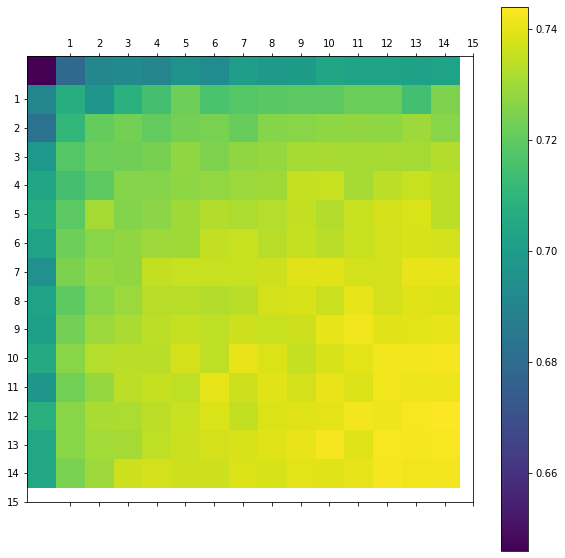

In [51]:
f, ax = plt.subplots(1, 1, figsize = (10,10))

heatmap = ax.matshow(train_auc)
f.colorbar(heatmap)

ax.set_xticks(p1)
ax.set_xticklabels(['%d' % p for p in p1])

ax.set_yticks(p2)
ax.set_yticklabels(['%d' % p for p in p2])

plt.show()

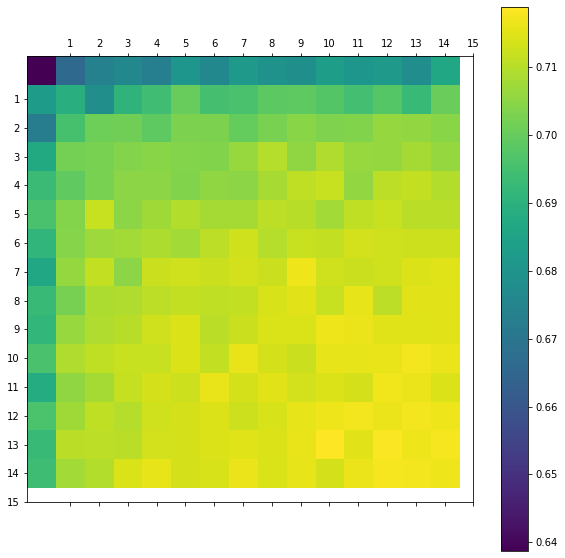

In [52]:
f, ax = plt.subplots(1, 1, figsize = (10,10))

heatmap = ax.matshow(val_auc)
f.colorbar(heatmap)

ax.set_xticks(p1)
ax.set_xticklabels(['%d' % p for p in p1])

ax.set_yticks(p2)
ax.set_yticklabels(['%d' % p for p in p2])

plt.show()

In [60]:
p1 = np.arange(16, 30) # n_bags
p2 = np.arange(16, 30) # nFeatures

train_auc3 = np.zeros([p1.shape[0], p2.shape[0]])
val_auc3 = np.zeros([p1.shape[0], p2.shape[0]])

for i in range(p1.shape[0]):
    for j in range(p2.shape[0]):
       
        bags = [] #self.learners

        for l in range(p1[i]):
            Xi, Yi = ml.bootstrapData(Xtr, Ytr, Xtr.shape[0])

            tree = ml.dtree.treeClassify(Xi, Yi, minParent = 2**6, maxDepth = 10, nFeatures = p2[j])
            bags.append(tree)
        
        bt = BaggedTree(bags)
        bt.classes = np.unique(Y)
        
        
        train_auc3[i][j] = bt.auc(Xtr, Ytr)
        val_auc3[i][j] = bt.auc(Xva, Yva)
            
        
        # here you would do your prediction & scoring
        # store scoring in acc[i][j]

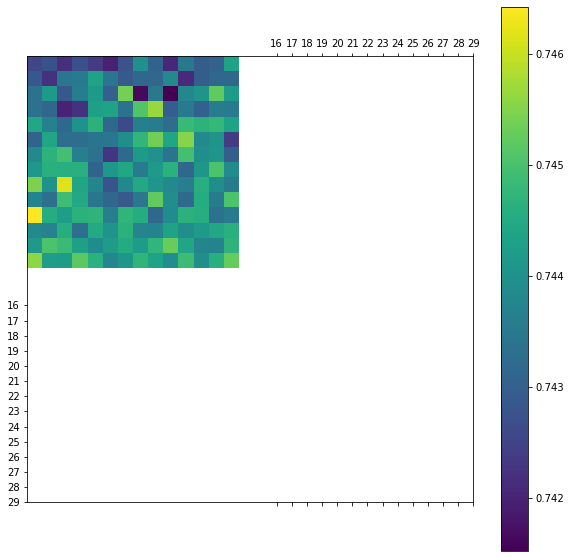

In [61]:
f, ax = plt.subplots(1, 1, figsize = (10,10))

heatmap = ax.matshow(train_auc3)
f.colorbar(heatmap)

ax.set_xticks(p1)
ax.set_xticklabels(['%d' % p for p in p1])

ax.set_yticks(p2)
ax.set_yticklabels(['%d' % p for p in p2])

plt.show()

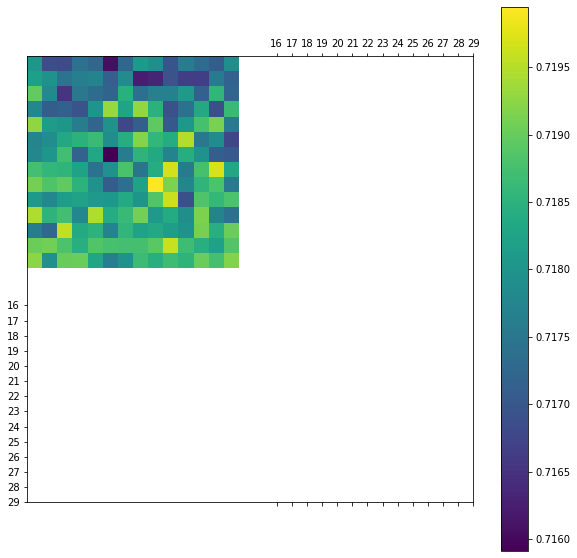

In [62]:
f, ax = plt.subplots(1, 1, figsize = (10,10))

heatmap = ax.matshow(val_auc3)
f.colorbar(heatmap)

ax.set_xticks(p1)
ax.set_xticklabels(['%d' % p for p in p1])

ax.set_yticks(p2)
ax.set_yticklabels(['%d' % p for p in p2])

plt.show()